<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/DataInput_Vector_Qiskit_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-kjqs51d0
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-kjqs51d0
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.7 MB/s eta 0:00:00
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17522 sha256=012c1c37786fc10d4db71e34e1ae0c0971426dca017a646449eb77a99505dde0
  Stored in directory: /tmp/pip-ephem-wheel-cache-rc9o2woa/wheels/a4/af/1e/358474758f89b7223d73e3a3b05d32a15554fede054868448c
Successfully built qiskit-textbook


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
import qiskit
qiskit.__version__

'1.2.4'

In [4]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [5]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [6]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
backend = StatevectorSimulator()
#backend = UnitarySimulator()

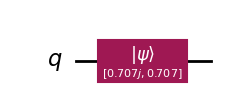

In [187]:
from math import sqrt, pi

qc2 = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc2.initialize(initial_state, 0)
qc2.draw('mpl')

In [188]:
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc2, shot=1024).result()
out_state = result.get_statevector()
print(out_state)

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


<IPython.core.display.Math object>

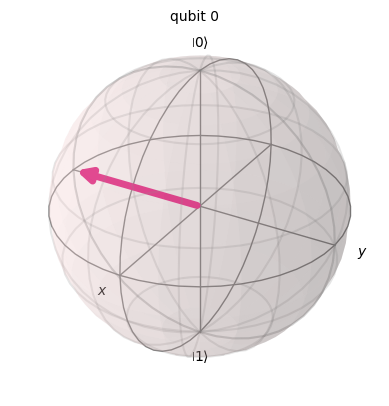

In [189]:
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(out_state)